#  PyTorch Lightning

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* https://lightning.ai/docs/pytorch/stable/starter/introduction.html
* https://lightning.ai/docs/pytorch/stable/levels/core_skills.html
* https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.core.LightningModule.html#lightning.pytorch.core.LightningModule.log
* https://lightning.ai/docs/pytorch/stable/extensions/logging.html
* https://lightning.ai/docs/pytorch/stable/common/progress_bar.html
* https://lightning.ai/docs/pytorch/stable/common/early_stopping.html
* https://lightning.ai/docs/pytorch/1.6.3/api/pytorch_lightning.utilities.model_summary.html#pytorch_lightning.utilities.model_summary.ModelSummary
* https://torchmetrics.readthedocs.io/en/stable/pages/lightning.html
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/
* https://www.youtube.com/watch?v=XbIN9LaQycQ&list=PLhhyoLH6IjfyL740PTuXef4TstxAK6nGP
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/data/datamodule.html

## Задачи для совместного разбора

1\. Создайте датасет для классификации и обучите модель при помощи PyTorch Lightning.

In [33]:
!pip install pytorch_lightning

In [34]:
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader, Dataset
from typing import Any, List, Optional, Union
import pytorch_lightning as pl

class MyLightningModule(pl.LightningModule):
    """
    Класс модуля PyTorch Lightning.

    Этот класс определяет структуру модели, шаги обучения, валидации и тестирования,
    а также настройки оптимизатора для обучения.
    """

    def __init__(self, n_inp, n_out):
        """Здесь определяется архитектура модели и инициализируются все необходимые слои."""
        super().__init__()
        self.fc = nn.Linear(n_inp,n_out)
        self.criterion = nn.CrossEntropyLoss()
        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Определяет прямой проход модели.

        Args:
            x (torch.Tensor): Входной тензор.

        Returns:
            torch.Tensor: Выходной тензор модели.
        """
        return self.fc(x)

    def training_step(self, batch: Any, batch_idx: int) -> torch.Tensor:
        """
        Выполняет один шаг обучения.

        Args:
            batch (Any): Батч данных для обучения.
            batch_idx (int): Индекс текущего батча.

        Returns:
            torch.Tensor: Значение функции потерь для этого шага.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('train_loss', loss, True, True,True,True)
        return loss
        

    def validation_step(self, batch: Any, batch_idx: int) -> None:
        """
        Выполняет один шаг валидации.

        Args:
            batch (Any): Батч данных для валидации.
            batch_idx (int): Индекс текущего батча.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('val_loss', loss, True, True,True,True)
        return loss

    def test_step(self, batch: Any, batch_idx: int) -> None:
        """
        Выполняет один шаг тестирования.

        Args:
            batch (Any): Батч данных для тестирования.
            batch_idx (int): Индекс текущего батча.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('test_loss', loss, True, True,True,True)
        return loss

    def configure_optimizers(self) -> torch.optim.Optimizer:
        """
        Настраивает оптимизатор для обучения модели.

        Returns:
            torch.optim.Optimizer: Настроенный оптимизатор.
        """
        return optim.Adam(self.parameters(), lr=0.001)

In [35]:
# model = MyLightningModule(5,3)
# trainer = pl.Trainer(max_epochs=10,)
# trainer.fit(model,data)

In [36]:
class MyDataModule(pl.LightningDataModule):
    """
    Класс модуля данных PyTorch Lightning.

    Этот класс отвечает за загрузку, подготовку и предоставление данных
    для обучения, валидации и тестирования модели.
    """

    def __init__(self):
        """
        Инициализирует модуль данных.

        Args:
            data_dir (str): Путь к директории с данными.
        """
        super().__init__()

    def prepare_data(self) -> None:
        """
        Подготавливает данные для использования.

        Здесь можно выполнить загрузку данных или другие подготовительные операции.
        """
        pass

    def setup(self, stage: Optional[str] = None) -> None:
        """
        Настраивает данные для использования на каждом этапе (обучение/валидация/тестирование).

        Args:
            stage (Optional[str]): Этап, на котором вызывается метод ("fit" или "test").
        """

    def train_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для обучающих данных.

        Returns:
            DataLoader: DataLoader с обучающими данными.
        """

    def val_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для данных валидации.

        Returns:
            DataLoader: DataLoader с данными валидации.
        """
        

    def test_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для тестовых данных.

        Returns:
            DataLoader: DataLoader с тестовыми данными.
        """

## Задачи для самостоятельного решения

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch as th
from tqdm.notebook import tqdm

<p class="task" id="1"></p>

1\. Загрузите набор данных из файла `Walmart.csv`. Выполните следующую процедуру предобработки:
- замените цены `Weekly_Sales` на логарифм цены;
- удалите столбец с датами;
- закодируйте столбцы `Store` и `Holiday_Flag` при помощи `TargetEncoder` (см. пакет [category_encoders](https://contrib.scikit-learn.org/category_encoders/));
- после кодирование выполните стандартизацию признаков;
- разбейте выборку на обучающее, валидационное и тестовое множество.

Все преобразования допускается делать при помощи `numpy`, `pandas` и `sklearn`.

- [ ] Проверено на семинаре

In [38]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [39]:
df = pd.read_csv('Walmart.csv')

df['Weekly_Sales'] = np.log1p(df['Weekly_Sales'])

df = df.drop('Date', axis=1)

X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

categorical_features = ['Store', 'Holiday_Flag']
encoder = TargetEncoder(cols=categorical_features)

encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train, columns=X.columns).head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1.315477,3.684569,-0.567131,-1.165268,-1.151924,0.938433
1,0.024362,-0.271402,0.259173,1.157092,1.361419,-1.238631
2,-1.800622,-0.271402,0.265141,-1.208963,1.003828,-0.819842
3,0.198987,-0.271402,-0.188431,1.069703,-0.928323,-0.098949
4,0.741406,-0.271402,1.414805,0.604357,1.380970,-0.889640


<p class="task" id="2"></p>

2\. В ячейках ниже представлен шаблонный код для обучения модели. В данной версии все реализовано "с нуля": обучение, метрики, визуализация, логирование, логика ранней остановки.

Используя набор данных из предыдущего задания, обучите модель, используя предложенную реализацию. Визуализируйте динамику изменения среднего значения функции потерь и метрик на обучающем и валидационном множестве. Интегрируйте реализацию ранней остановки в цикл обучения. Посчитайте и выведите на экран значения метрик на тестовом множестве.

- [ ] Проверено на семинаре

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def r2_score(y_true, y_pred):
    total_sum_squares = torch.sum((y_true - y_true.mean())**2)
    residual_sum_squares = torch.sum((y_true - y_pred)**2)
    r2 = 1 - (residual_sum_squares / total_sum_squares)
    return r2

def mape_score(y_true, y_pred):
    return torch.mean(torch.abs((y_true - y_pred) / y_true)) * 100

In [42]:
class RegressionModel(nn.Module):
    def __init__(self, n_inputs, h_hidden):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = out.relu()
        out = self.fc2(out)
        return out

In [43]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [44]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    train_losses, val_losses = [], []
    train_r2s, val_r2s = [], []
    train_mapes, val_mapes = [], []
    
    for epoch in tqdm(range(num_epochs), desc ='Training model'):
        model.train()
        train_loss, train_r2, train_mape = 0.0, 0.0, 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).flatten()
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_r2 += r2_score(targets, outputs).item()
            train_mape += mape_score(targets, outputs).item()
        
        train_loss /= len(train_loader)
        train_r2 /= len(train_loader)
        train_mape /= len(train_loader)
        train_losses.append(train_loss)
        train_r2s.append(train_r2)
        train_mapes.append(train_mape)
        
        model.eval()
        val_loss, val_r2, val_mape = 0.0, 0.0, 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs).flatten()
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                val_r2 += r2_score(targets, outputs).item()
                val_mape += mape_score(targets, outputs).item()
                
        val_loss /= len(val_loader)
        val_r2 /= len(val_loader)
        val_mape /= len(val_loader)
        val_losses.append(val_loss)
        val_r2s.append(val_r2)
        val_mapes.append(val_mape)
        
        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        # Логика ранней остановки
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Ранняя остановка!")
            break
    
    return train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes

In [45]:
def plot_metrics(history):
    train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes = history
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(18, 5))
    
    # График функции потерь
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    
    # График R2
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_r2s, 'b-', label='Train R2')
    plt.plot(epochs, val_r2s, 'r-', label='Validation R2')
    plt.title('R2 Score vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)
    
    # График MAPE
    plt.subplot(1, 3, 3)
    plt.plot(epochs, train_mapes, 'b-', label='Train MAPE')
    plt.plot(epochs, val_mapes, 'r-', label='Validation MAPE')
    plt.title('MAPE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAPE (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [46]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss, test_r2, test_mape = 0.0, 0.0, 0.0
    with th.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs).flatten()
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            test_r2 += r2_score(targets, outputs).item()
            test_mape += mape_score(targets, outputs).item()
            
    test_loss /= len(test_loader)
    test_r2 /= len(test_loader)
    test_mape /= len(test_loader)
    
    print("\n--- Метрики на тестовом множестве ---")
    print(f"MSE: {test_loss:.4f}")
    print(f"R2 Score: {test_r2:.4f}")
    print(f"MAPE: {test_mape:.2f}%")

In [47]:
batch_size = 32
learning_rate = 0.01
patience = 5
num_epochs = 100
n_inputs = X_train.shape[1]
h_hidden = 128

Training model:   0%|          | 0/100 [00:00<?, ?it/s]

Ранняя остановка!


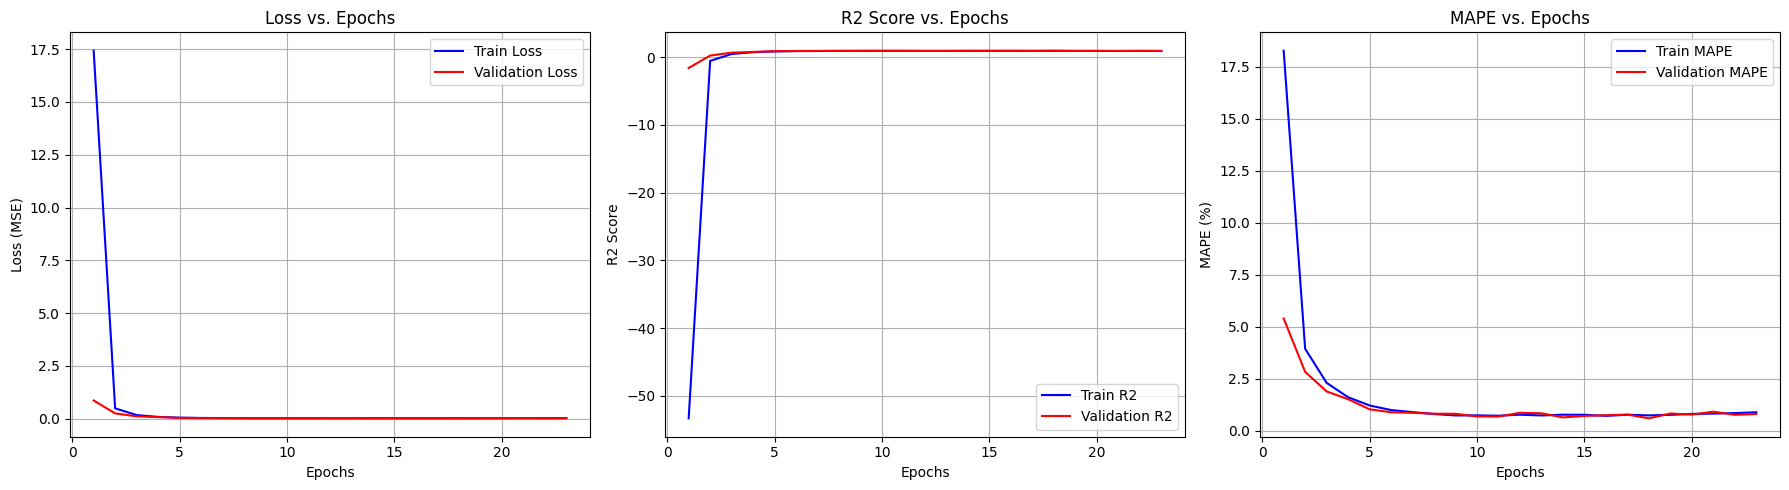


--- Метрики на тестовом множестве ---
MSE: 0.0193
R2 Score: 0.9385
MAPE: 0.77%


In [48]:
X_train_tensor = th.tensor(X_train, dtype=th.float32)
y_train_tensor = th.tensor(y_train.values, dtype=th.float32)
X_val_tensor = th.tensor(X_val, dtype=th.float32)
y_val_tensor = th.tensor(y_val.values, dtype=th.float32)
X_test_tensor = th.tensor(X_test, dtype=th.float32)
y_test_tensor = th.tensor(y_test.values, dtype=th.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = RegressionModel(n_inputs=n_inputs, h_hidden=h_hidden)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience)

history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping)
train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes = history

plot_metrics(history)


evaluate_model(model, test_loader, criterion)

<p class="task" id="3"></p>

3\. Перепишите логику обучения модели, используя `pytorch_lightning`. Для расчета метрик $R^2$ и MAPE можно использовать `torchmetrics`. Ранняя остановка в данном задании не требуется. После завершения обучения посчитайте значения метрик на тестовом множестве.

В процессе обучения настройки progressbar так, что:
* для каждого батча во время обучения рассчитывается значение функции потерь и метрик, по завершению эпохи показатели усредняются;
* для каждого батча во время валидации рассчитывается значение функции потерь и метрик, по завершению эпохи показатели усредняются.

- [ ] Проверено на семинаре

<p class="task" id="4"></p>

4\. Повторите задачу 3, добавив логику ранней остановки, используя callback `pytorch_lightning`. Если значение функции потерь на валидационном множестве не улучшалось в течении 5 эпох, происходит ранняя остановка.

- [ ] Проверено на семинаре

<p class="task" id="5"></p>

5\. Повторите задачу 4, оформив набор данных в виде `pytorch_lightning.LightningDataModule`. Всю логику по созданию датасета (преобразования признаков, разбиение и т.д.) запакуйте в метод `setup`. 

- [ ] Проверено на семинаре

<p class="task" id="6"></p>

6\. Повторите задачу 5, добавив логирование при помощи `mlflow` или любого аналогичного решения для визуализации, с которым `lightning` умеет работать. 

Вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс со всеми нужными визуализациями.

- [ ] Проверено на семинаре